In [3]:
import pandas as pd

### <font color = #2467C0>Slicing Out Columns</font>

In [4]:
movies = pd.read_csv('../Week-4-Pandas/movielens/movies.csv', sep = ',')
tags = pd.read_csv('../Week-4-Pandas/movielens/tags.csv', sep = ',')
ratings = pd.read_csv('../Week-4-Pandas/movielens/ratings.csv', sep = ',')

In [5]:
tags['tag'].head()

0             classic
1              sci-fi
2         dark comedy
3      great dialogue
4    so bad it's good
Name: tag, dtype: object

In [6]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [10]:
ratings[-10:]

,userId,movieId,rating,timestamp
25000085,162541,8983,4.5,1240953211
25000086,162541,31658,4.5,1240953287
25000087,162541,33794,4.0,1240951792
25000088,162541,41566,4.0,1240952749
25000089,162541,45517,4.5,1240953353
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434
25000094,162541,63876,5.0,1240952515


In [8]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

Hiroyuki Nakano          1
alins                    1
wind farm                1
women-centric            1
Jami Gertz               1
AFI #32                  1
Babe                     1
anoying neighbours       1
Aarón Fernández Lesur    1
chemo                    1
Name: tag, dtype: int64

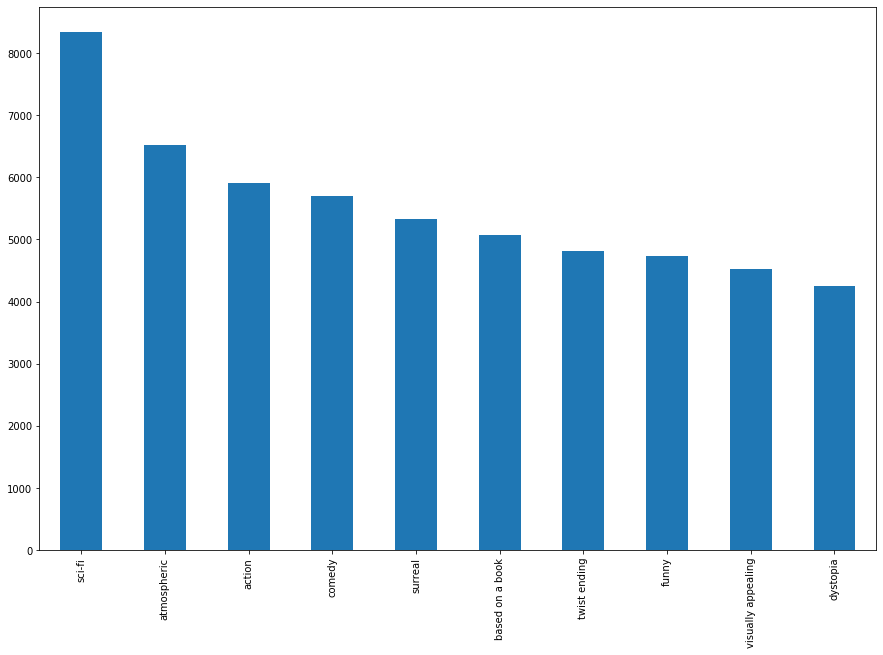

In [12]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

### <font color = #2467C0>Filters for Selecting Rows</font>

In [13]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][30:50]

,userId,movieId,rating,timestamp
49,1,7365,4.0,1147869033
54,1,7940,4.5,1147877967
56,1,8154,5.0,1147868865
57,1,8327,5.0,1147879375
58,1,8360,4.0,1147868682
62,1,8786,4.0,1147877853
64,1,8973,4.0,1147869211
66,1,27266,4.5,1147879365
69,1,32591,5.0,1147879538
72,2,110,5.0,1141416589


In [14]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:15]

,movieId,title,genres
309,313,"Swan Princess, The (1994)",Animation|Children
359,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
387,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
545,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
551,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
580,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
586,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
587,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
588,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
602,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


In [15]:
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
309,313,"Swan Princess, The (1994)",Animation|Children
359,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
387,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
545,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
551,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


### <font color = #2467C0>Group By and Aggregate</font>

In [16]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,393068
1.0,776815
1.5,399490
2.0,1640868
2.5,1262797
3.0,4896928
3.5,3177318
4.0,6639798
4.5,2200539


In [17]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.893708
2,3.251527
3,3.142028
4,2.853547
5,3.058434


In [18]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,57309
2,24228
3,11804
4,2523
5,11714


In [19]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
209157,1
209159,1
209163,1
209169,1
209171,1


### <font color = #2467C0>Merge Dataframes</font>

In [ ]:
tags.head()

In [ ]:
movies.head()

In [ ]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html